### Validation for lake level derived by SWOT data.
##### 1. Comparison among the lake levels derived by SWOT pixc data, SWOT LakeSp data, and DAHITI data.
##### 2. Comparison between swot pixc and icesat-2 data derived lake level.
##### 3. Comparison between simple average and area-weighted average method in swot pixc data processing.

In [1]:
import numpy as np  
import pandas as pd  
import netCDF4 as nc
import seaborn as sns
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker 
from matplotlib import dates as mdates
from matplotlib.ticker import MultipleLocator
from utils.date_transform import date_to_decimal, decimal_to_date


In [2]:
## set plot style
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # set font to Microsoft YaHei
plt.rcParams['font.weight'] = 'bold'  # set global font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # set axes label weight to bold
plt.rcParams['axes.titleweight'] = 'bold'  # set title weight to bold


### 1. SWOT pixc vs. SWOT LakeSp vs. DAHITI data.

In [3]:
## dianchi
path_dahiti_pixc_lakesp_dianchi = 'data/eva_data/dahiti_pixc_lakesp_dianchi.csv'  
## erhai
path_dahiti_pixc_lakesp_erhai = 'data/eva_data/dahiti_pixc_lakesp_erhai.csv'


In [4]:
dahiti_pixc_lakesp_dianchi = pd.read_csv(path_dahiti_pixc_lakesp_dianchi, index_col=0)
dahiti_pixc_lakesp_erhai = pd.read_csv(path_dahiti_pixc_lakesp_erhai, index_col=0)
dahiti_pixc_lakesp_dianchi


,dahiti_wse,swot_pixc_wse,swot_lakesp_wse,swot_pixc_wse_cor,swot_lakesp_wse_cor
year_month,,,,,
2023-08,1887.4993,1887.8667,1887.907000,1887.5831,1887.463708
2023-09,1887.4312,1887.7599,1887.924500,1887.4763,1887.481208
2023-10,1887.5302,1887.7974,1887.983333,1887.5138,1887.540041
2023-11,1887.5972,1887.7504,1888.191500,1887.4668,1887.748208
2023-12,1887.4482,1887.7639,1887.847500,1887.4803,1887.404208
2024-01,1887.4261,1887.7036,1888.042000,1887.4200,1887.598708
2024-02,1887.4602,1887.7856,1887.939500,1887.5021,1887.496208
2024-03,1887.4592,1887.7152,1887.800000,1887.4316,1887.356708
2024-04,1887.3192,1887.6403,1887.781000,1887.3567,1887.337708


In [5]:
def calculate_rmse_corr(vars_df, 
                        var_ref_name='dahiti_wse', 
                        var_name='SWOT_pixc_wse_cor'):
  rmse_pixc_dahiti = np.sqrt(((vars_df[var_name] - \
                                      vars_df[var_ref_name]) ** 2).mean())
  corr_ref_var1 = vars_df[var_ref_name].corr(vars_df[var_name])
  return rmse_pixc_dahiti, corr_ref_var1

def calculate_slope_intercept(vars_df, 
                              var_ref_name='dahiti_wse',
                              var_name='SWOT_pixc_wse'):
    vars_df = vars_df[[var_ref_name, var_name]].dropna()
    x_vars, y_vars = vars_df[var_ref_name].values, vars_df[var_name].values
    slope_vars, intercept_vars = np.polyfit(x_vars, y_vars, 1)
    return slope_vars, intercept_vars


In [6]:
# def calculate_rmse_corr(ref_vars_df, 
#                         var_ref_name='dahiti_wse', 
#                         var_1_name='SWOT_pixc_wse_cor', 
#                         var_2_name='SWOT_LakeSP_wse_cor'):
#   rmse_pixc_dahiti = np.sqrt(((ref_vars_df[var_1_name] - \
#                                       ref_vars_df[var_ref_name]) ** 2).mean())
#   rmse_lakesp_dahiti = np.sqrt(((ref_vars_df[var_2_name] - \
#                                       ref_vars_df[var_ref_name]) ** 2).mean())
#   corr_ref_var1 = ref_vars_df[var_ref_name].corr(ref_vars_df[var_1_name])
#   corr_ref_var2 = ref_vars_df[var_ref_name].corr(ref_vars_df[var_2_name])
#   return rmse_pixc_dahiti, rmse_lakesp_dahiti, corr_ref_var1, corr_ref_var2

# def calculate_slope_intercept(ref_vars_df, var_ref_name='dahiti_wse',
#                               var_1_name='SWOT_pixc_wse', var_2_name='SWOT_LakeSP_wse'):
#     ref_var1_df = ref_vars_df[[var_ref_name, var_1_name]].dropna() 
#     x_ref_var1, y_ref_var1 = ref_var1_df[var_ref_name].values, ref_var1_df[var_1_name].values
#     slope_ref_var1, intercept_ref_var1 = np.polyfit(x_ref_var1, y_ref_var1, 1)
#     ref_var2_df = ref_vars_df[[var_ref_name, var_2_name]].dropna()
#     x_ref_var2, y_ref_var2 = ref_var2_df[var_ref_name].values, ref_var2_df[var_2_name].values
#     slope_ref_var2, intercept_ref_var2 = np.polyfit(x_ref_var2, y_ref_var2, 1)
#     return slope_ref_var1, intercept_ref_var1, slope_ref_var2, intercept_ref_var2


In [39]:
def plot_correlation(ax, ref_vars_df, 
                         var_ref_name='dahiti_wse', 
                         var_1_name = 'SWOT_pixc_wse', 
                         var_1_label='SWOT PIXC', 
                         var_2_name = None, 
                         var_2_label= None, 
                         x_range = None, 
                         y_range = None, 
                         y_step=0.2, 
                         x_step=0.1,\
                         ref_line_range=None,
                         label_loc = (0.05, 0.77), 
                         label_fontsize=14,
                         equation=False,
                         equation_1_loc=(0.3, 0.06), equation_1_fontsize=16,
                         equation_2_loc=(0.05, 0.60), equation_2_fontsize=16
                     ):

     rmse_var_1, corr_var_1 = calculate_rmse_corr(ref_vars_df, 
                                                  var_ref_name=var_ref_name, 
                                                  var_name= var_1_name)
     acc = [rmse_var_1, corr_var_1]
     ## using seaborn for confidence interval ploting
     sns.regplot(x=var_ref_name, y=var_1_name, data=ref_vars_df,  
                    ax=ax,
                    scatter_kws={'color': 'blue', 'alpha': 0.8}, 
                    ## (R: {corr_var_1:.3f}, RMSE: {rmse_var_1:.3f})
                    line_kws={'color': 'blue','linewidth': 3, 
                              'label': f'{var_1_label}'
                              })
     ### plot equation     
     slope_var_1, intercept_var_1 = calculate_slope_intercept(ref_vars_df, 
                                                            var_ref_name=var_ref_name, 
                                                            var_name=var_1_name)
     if var_2_name is not None:
          rmse_var_2, corr_var_2 = calculate_rmse_corr(ref_vars_df, 
                                                       var_ref_name=var_ref_name, 
                                                       var_name= var_2_name)
          acc.extend([rmse_var_2, corr_var_2])
          slope_var_2, intercept_var_2 = calculate_slope_intercept(ref_vars_df, 
                                                                 var_ref_name=var_ref_name, 
                                                                 var_name=var_2_name)
          sns.regplot(x=var_ref_name, 
                         y=var_2_name, 
                         data=ref_vars_df,  
                         ax=ax,
                         x_ci = 95,
                         scatter_kws={'color': 'green', 'alpha': 0.8}, 
                         ## (R: {corr_var_2:.3f}, RMSE: {rmse_var_2:.3f})
                         line_kws={'color': 'green','linewidth': 3, 
                                   'label': f'{var_2_label}'})
     if equation:
          equation_ref_var_1 = f'y = {slope_var_1:.3f}x + {intercept_var_1:.3f}' \
                                                  if intercept_var_1 >= 0 else f'y = {slope_var_1:.3f}x - {-intercept_var_1:.3f}'
          ax.text(equation_1_loc[0], equation_1_loc[1], 
                    equation_ref_var_1, transform=ax.transAxes,
                    fontsize=equation_1_fontsize, color='blue', ha='left', 
                    bbox=dict(facecolor='none', alpha=0.8, edgecolor='none'))
          if var_2_name is not None:
               equation_ref_var_2 = f'y = {slope_var_2:.3f}x + {intercept_var_2:.3f}' \
                                                       if intercept_var_2 >= 0 else f'y = {slope_var_2:.3f}x - {-intercept_var_2:.3f}'
               ax.text(equation_2_loc[0], equation_2_loc[1], 
                         equation_ref_var_2, transform=ax.transAxes,
                         fontsize=equation_2_fontsize, color='green', 
                         ha='left', bbox=dict(facecolor='none', alpha=0.8, edgecolor='none'))

     if ref_line_range is not None:
          ax.plot(ref_line_range, 
                  ref_line_range, 
                  color='brown', 
                  linestyle='--', 
                  linewidth=1.5, 
                  label='1:1 Reference Line')  # 1:1 reference line

     ## set axis format
     ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # 显示一位小数
     ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # 显示一位小数
     ax.xaxis.set_major_locator(MultipleLocator(x_step)) 
     ax.yaxis.set_major_locator(MultipleLocator(y_step)) 
     ## set y axis limits
     if y_range is not None:
          ax.set_ylim([y_range[0], y_range[1]]);      
     if x_range is not None:
          ax.set_xlim([x_range[0], x_range[1]]);

     ax.legend(fontsize=label_fontsize, frameon=False, loc=label_loc)
     ax.set_xlabel('DAHITI Water Level (m)', fontsize=14)
     ax.set_ylabel('SWOT Water Level (m)', fontsize=14)
     ax.tick_params(axis='both', labelsize=14)
     ax.grid(True, linestyle='--',alpha=0.6)
     return ax, acc


rmse_pix: 0.05712755078615584 corr_pix: 0.879148056681425
rmse_lakesp: 0.0811824720154058 corr_lakesp: 0.877875165988877


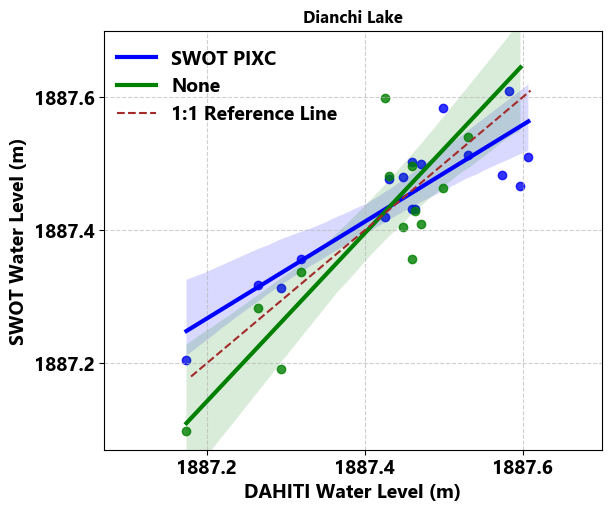

In [26]:
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
ax,acc = plot_correlation(ax=ax, 
                    ref_vars_df=dahiti_pixc_lakesp_dianchi, 
                    var_ref_name='dahiti_wse', 
                    var_1_name='swot_pixc_wse_cor', 
                    var_2_name='swot_lakesp_wse_cor',
                    x_range=[1887.07, 1887.7],
                    y_range=[1887.07, 1887.7],
                    ref_line_range=[1887.18, 1887.61],
                    y_step=0.2, 
                    x_step=0.2, 
                    label_loc=(0.01, 0.76),
                    label_fontsize=14,
                    )
# ax.legend()
ax.set_title('Dianchi Lake')
print('rmse_pix:', acc[0], 'corr_pix:', acc[1])
print('rmse_lakesp:', acc[2], 'corr_lakesp:', acc[3])


rmse_pix: 0.08343360234340337 corr_pix: 0.9556804388362984
rmse_lakesp: 0.12796136447094095 corr_lakesp: 0.9028537762465854


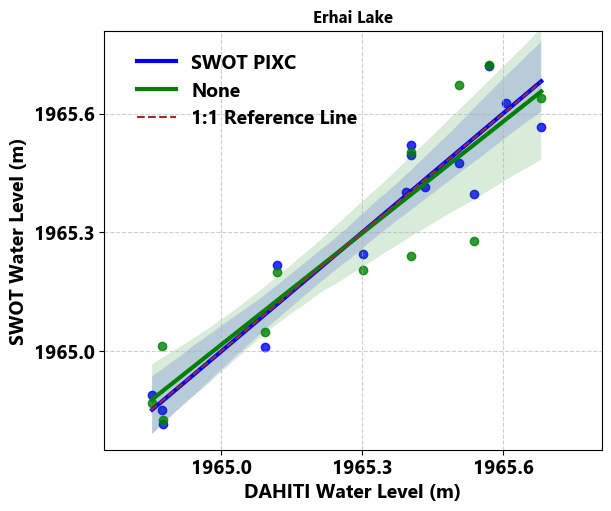

In [27]:
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
ax, acc = plot_correlation(ax=ax, 
                      ref_vars_df=dahiti_pixc_lakesp_erhai, 
                      x_step=0.3,
                      y_step=0.3,
                      x_range=[1964.75, 1965.81],
                      y_range=[1964.75, 1965.81],
                      ref_line_range=[1964.85, 1965.68],
                      var_ref_name='dahiti_wse', 
                      var_1_name='swot_pixc_wse_cor', 
                      var_2_name='swot_lakesp_wse_cor',
                      label_loc=(0.05, 0.75),
                      )
ax.set_title('Erhai Lake')
print('rmse_pix:', acc[0], 'corr_pix:', acc[1])
print('rmse_lakesp:', acc[2], 'corr_lakesp:', acc[3])


In [28]:
# pixc_lakesp_dahiti_df = pd.DataFrame(pixc_lakesp_dahiti_df)
def plot_wse(ax, ref_vars_df, y_range = None, y_step=0.2, x_step=2,
                var_ref_name='dahiti_wse', 
                var_ref_label='DAHITI WSE', 
                var_1_name='swot_pixc_wse_cor', 
                var_1_label='SWOT PIXC WSE',
                rmse_label_1 = 'PIXC RMSE',
                var_2_name=None,               
                var_2_label=None, 
                rmse_label_2 = None, 
                labels_acc=False,
                label_loc=(0.51, 0.72), 
                labels_fontsize=14,
                rmse_label_loc=(0.02, 0.1), 
                rmse_label_fontsize=15):
        rmse_var_1,  corr_var_1= calculate_rmse_corr(ref_vars_df, 
                                                        var_ref_name=var_ref_name, 
                                                        var_name=var_1_name)        

        date_year_month = pd.to_datetime(ref_vars_df.index) 
        ax.plot(date_year_month, ref_vars_df[var_ref_name], 
                label=var_ref_label, color='red', marker='o', markersize=6, 
                linewidth=1, linestyle='-')
        ax.plot(date_year_month, ref_vars_df[var_1_name], 
                label=var_1_label, color='blue', marker='s', markersize=6, 
                linewidth=1, linestyle='-')
        if var_2_name is not None:
                rmse_var_2,  corr_var_2= calculate_rmse_corr(ref_vars_df, 
                                                                var_ref_name=var_ref_name, 
                                                                var_name=var_2_name)        
                ax.plot(date_year_month, ref_vars_df[var_2_name], 
                        label=var_2_label, color='green', marker='^', markersize=6, 
                        linewidth=1, linestyle='-')

        ax.grid(True, linestyle='--', alpha=0.5, color='lightgray')
        ### 添加标注
        if labels_acc:
                ax.text(rmse_label_loc[0], rmse_label_loc[1],
                        f'{rmse_label_1}: {rmse_var_1:.3f}\n\n{rmse_label_2}: {rmse_var_2:.3f}',
                        fontsize=rmse_label_fontsize, verticalalignment='bottom', 
                        horizontalalignment='left', transform=ax.transAxes,
                        linespacing=0.8)

        ax.legend(loc=label_loc, frameon=False, fontsize=labels_fontsize)
        # 固定刻度位置和标签
        specific_months = ['2023-09', '2024-01', '2024-05', '2024-09']
        specific_dates = [pd.to_datetime(month + '-01') for month in specific_months]

        ax.set_xticks(specific_dates)
        ax.set_xticklabels(specific_months)
        plt.xticks(rotation=0, ha='right', fontsize=14)
        for label in ax.get_xticklabels():
                label.set_horizontalalignment('center')
        ## set y axis limits
        if y_range is not None:
                ax.set_ylim([y_range[0], y_range[1]]); 
        ax.set_ylabel('Height In (m)', fontsize=14)
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=x_step))
        ax.yaxis.set_major_locator(MultipleLocator(y_step)) 
        ax.tick_params(axis='y', labelsize=14)
        return ax


Text(0.5, 1.0, 'Dianchi Lake')

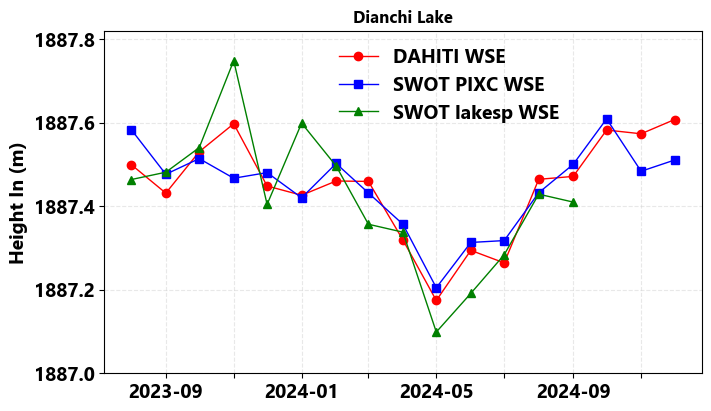

In [29]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot_wse(ax=ax, 
        ref_vars_df=dahiti_pixc_lakesp_dianchi, 
        var_1_name='swot_pixc_wse_cor', 
        var_1_label='SWOT PIXC WSE',
        var_2_name='swot_lakesp_wse_cor', 
        var_2_label='SWOT lakesp WSE',
        y_range = [1887.0, 1887.82], 
        label_loc=(0.38, 0.71),
        y_step=0.2, 
        x_step=2)
ax.set_title('Dianchi Lake')


Text(0.5, 1.0, 'Erhai Lake')

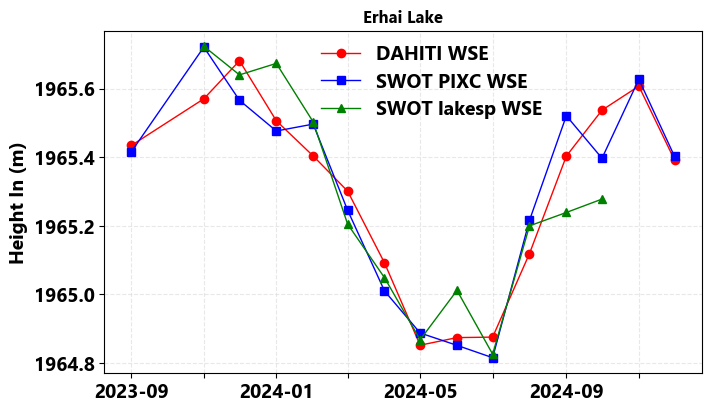

In [30]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot_wse(ax=ax, 
          ref_vars_df=dahiti_pixc_lakesp_erhai, 
          var_1_name='swot_pixc_wse_cor', 
          var_1_label='SWOT PIXC WSE',
          var_2_name='swot_lakesp_wse_cor', 
          var_2_label='SWOT lakesp WSE',
          label_loc=(0.35, 0.72), 
          rmse_label_loc=(0.06, 0.12))
ax.set_title('Erhai Lake')


### 2. SWOT pixc vs. icesat-2

In [ ]:
# path_pixc_isat2_dianchi = 'data/eva_data/pixc_isat2_dianchi.csv' ## save to path
# path_pixc_isat2_erhai = 'data/eva_data/pixc_isat2_erhai.csv' ## save to path


In [ ]:
# pixc_isat2_dianchi = pd.read_csv(path_pixc_isat2_dianchi, index_col=0)
# pixc_isat2_erhai = pd.read_csv(path_pixc_isat2_erhai, index_col=0)
# pixc_isat2_dianchi 


,swot_pixc_wse,isat2_wse,isat2_wse_cor
year_month,,,
2023-08,1887.8667,1887.720375,1887.754511
2023-09,1887.7599,NaN,NaN
2023-10,1887.7974,1887.784377,1887.818513
2023-11,1887.7504,NaN,NaN
2023-12,1887.7639,NaN,NaN
2024-01,1887.7036,NaN,NaN
2024-02,1887.7856,NaN,NaN
2024-03,1887.7152,NaN,NaN
2024-04,1887.6403,NaN,NaN


rmse_pixc: 0.08101790851823949 corr_pixc: 0.8736632983253846


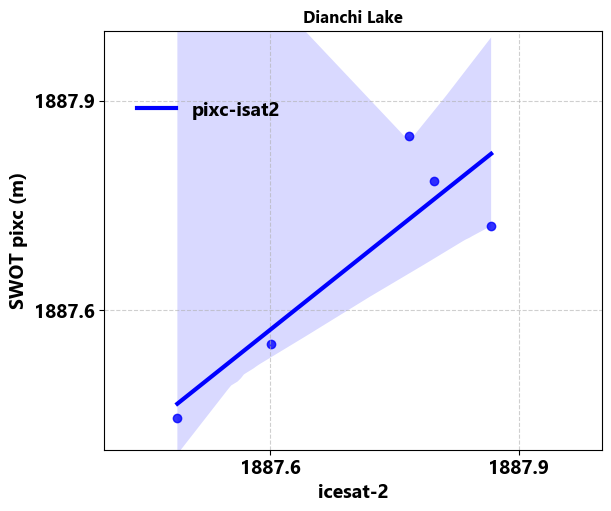

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
# ax, acc = plot_correlation(ax=ax, 
#                       ref_vars_df=pixc_isat2_dianchi, 
#                       var_ref_name='swot_pixc_wse', 
#                       var_1_name='isat2_wse', 
#                       var_1_label='pixc-isat2',
#                       x_step=0.3,
#                       y_step=0.3,
#                       x_range=[1887.4, 1888],                      
#                       y_range=[1887.4, 1888],
#                     #   y_range=[1965.2, 1966.4],
#                       # ref_line_range=[1964.85, 1965.68],
#                       # label_loc=(0.05, 0.75),
#                       )
# ax.set_xlabel('icesat-2', fontsize=14)
# ax.set_ylabel('SWOT pixc (m)', fontsize=14)
# ax.set_title('Dianchi Lake')
# print('rmse_pixc:', acc[0], 'corr_pixc:', acc[1])


rmse_pixc: 0.17765514510548222 corr_pixc: 0.9327738175168151


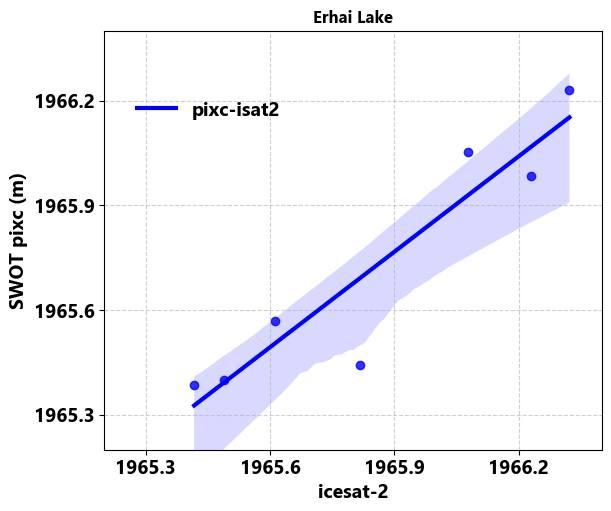

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
# ax2, acc = plot_correlation(ax=ax, 
#                       ref_vars_df=pixc_isat2_erhai, 
#                       var_ref_name='swot_pixc_wse', 
#                       var_1_name='isat2_wse', 
#                       var_1_label='pixc-isat2',
#                       x_step=0.3,
#                       y_step=0.3,
#                       x_range=[1965.2, 1966.4],
#                       y_range=[1965.2, 1966.4],
#                       # ref_line_range=[1964.85, 1965.68],
#                       # label_loc=(0.05, 0.75),
#                       )
# ax.set_xlabel('icesat-2', fontsize=14)
# ax.set_ylabel('SWOT pixc (m)', fontsize=14)
# ax2.set_title('Erhai Lake')
# print('rmse_pixc:', acc[0], 'corr_pixc:', acc[1])


### 3. simple average vs. area-weighted average.

In [108]:
path_dahiti_unweighted_weighted_dianchi = 'data/eva_data/dahiti_unweighted_weighted_dianchi.csv' ## 
path_dahiti_unweighted_weighted_erhai = 'data/eva_data/dahiti_unweighted_weighted_erhai.csv' ## 
dahiti_unweighted_weighted_dianchi = pd.read_csv(path_dahiti_unweighted_weighted_dianchi, index_col=0)
dahiti_unweighted_weighted_erhai = pd.read_csv(path_dahiti_unweighted_weighted_erhai, index_col=0)


Text(0.5, 1.0, 'Dianchi Lake')

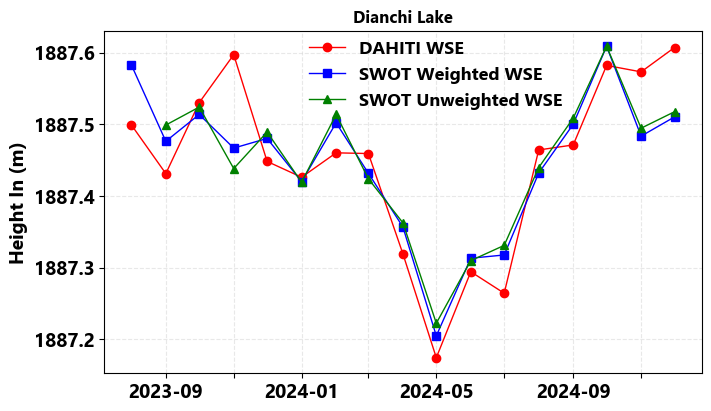

In [109]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot_wse(ax=ax, ref_vars_df=dahiti_unweighted_weighted_dianchi,
            var_ref_name='dahiti_wse',  
            var_ref_label='DAHITI WSE',
            var_1_name='pixc_wse_weighted_cor', 
            var_1_label='SWOT Weighted WSE',             
            var_2_name='pixc_wse_unweighted_cor',
            var_2_label='SWOT Unweighted WSE', 
            y_step=0.1,
            label_loc=(0.33, 0.75), 
            labels_fontsize=13, 
            rmse_label_1 = 'RMSE Weighted', 
            rmse_label_2 = 'RMSE Unweighted', 
            rmse_label_loc=(0.04, 0.1))
ax.set_title('Dianchi Lake')


Text(0.5, 1.0, 'Erhai Lake')

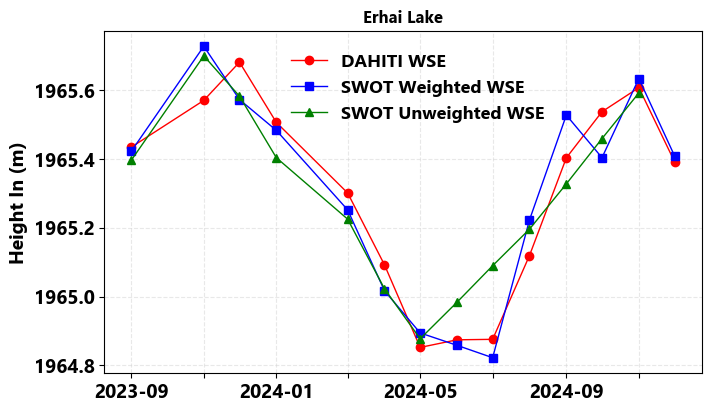

In [110]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot_wse(ax=ax, ref_vars_df=dahiti_unweighted_weighted_erhai, \
            var_ref_name='dahiti_wse',  
            var_ref_label='DAHITI WSE', 
            var_1_name='pixc_wse_weighted_cor', 
            var_1_label='SWOT Weighted WSE', 
            var_2_name='pixc_wse_unweighted_cor',
            var_2_label='SWOT Unweighted WSE', 
            label_loc=(0.3, 0.71), 
            labels_fontsize=13, 
            rmse_label_1 = 'RMSE Weighted', 
            rmse_label_2 = 'RMSE Unweighted', 
            rmse_label_loc=(0.03, 0.1))
ax.set_title('Erhai Lake')


rmse_unweighted: 0.06203037518385676 rmse_weighted: 0.05712755078615584
corr_unweighted: 0.8661870670295218 corr_weighted: 0.879148056681425


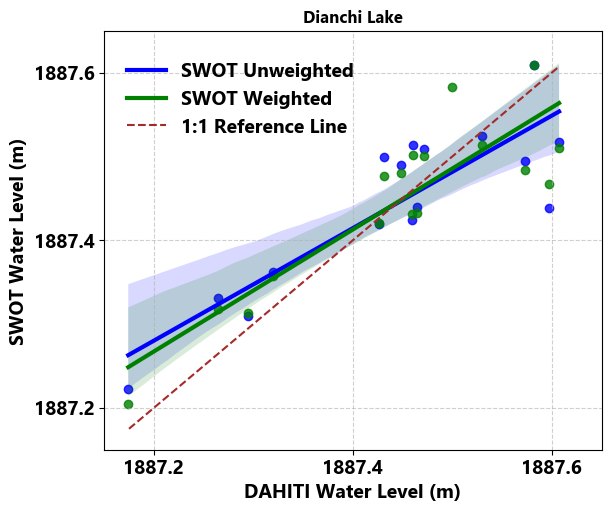

In [118]:
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
ax, acc = plot_correlation(ax=ax, 
                        ref_vars_df=dahiti_unweighted_weighted_dianchi, 
                        x_range=[1887.15, 1887.65],
                        y_range=[1887.15, 1887.65],
                        x_step=0.2,
                        y_step=0.2,                         
                        var_ref_name='dahiti_wse',
                        var_1_name='pixc_wse_unweighted_cor', 
                        var_1_label='SWOT Unweighted', 
                        var_2_name='pixc_wse_weighted_cor', 
                        var_2_label='SWOT Weighted', 
                        label_fontsize=14, 
                        label_loc=(0.03, 0.73), 
                        ref_line_range =[1887.175, 1887.607])
ax.set_title('Dianchi Lake')
print('rmse_unweighted:', acc[0], 'rmse_weighted:', acc[1])
print('corr_unweighted:', acc[2], 'corr_weighted:', acc[3])

rmse_unweighted: 0.09820403982674246 rmse_weighted: 0.08243419453457852
corr_unweighted: 0.9443115283980333 corr_weighted: 0.9584021737320043


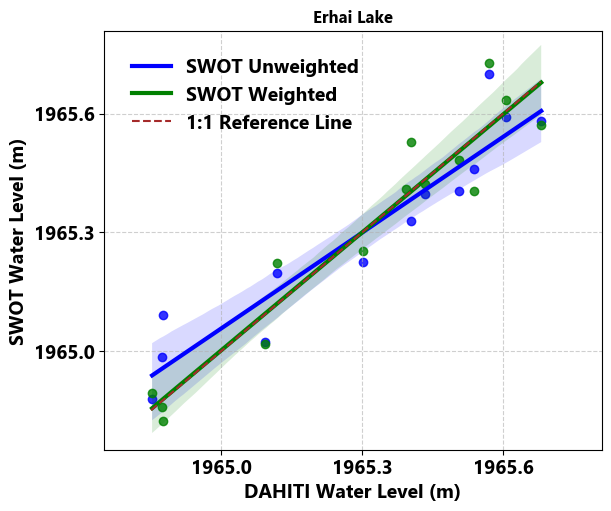

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
ax, acc = plot_correlation(ax=ax, 
                        ref_vars_df=dahiti_unweighted_weighted_erhai, 
                        x_range=[1964.75, 1965.81],
                        y_range=[1964.75, 1965.81],
                        x_step=0.3, 
                        y_step=0.3,
                        var_ref_name='dahiti_wse', 
                        var_1_name='pixc_wse_unweighted_cor', 
                        var_1_label='SWOT Unweighted', 
                        var_2_name='pixc_wse_weighted_cor', 
                        var_2_label='SWOT Weighted', 
                        label_fontsize=14, 
                        label_loc=(0.04, 0.74), 
                        ref_line_range =[1964.85, 1965.68])
ax.set_title('Erhai Lake')
print('rmse_unweighted:', acc[0], 'rmse_weighted:', acc[1])
print('corr_unweighted:', acc[2], 'corr_weighted:', acc[3])
